<a href="https://colab.research.google.com/github/puvvulam/Sentiment-analysis-of-consumer-feedback-/blob/main/Dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries and Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import warnings
import json,csv
import nltk
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,classification_report
import string
import re
import xgboost as xgb
import pdb
import keras
from keras import backend as K
from tensorflow.keras.layers import Embedding
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence, text
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.callbacks import EarlyStopping , ReduceLROnPlateau
import tensorflow as tf

from transformers import (pipeline , BertTokenizer,TFBertForSequenceClassification,InputExample, InputFeatures , AutoTokenizer, TFAutoModelForSequenceClassification,
                          TFRobertaModel, TFGPT2Model, RobertaTokenizer, GPT2Tokenizer)

In [ ]:
%%capture
!pip install tensorflow_text
!pip install transformers
!pip install simpletransformers

In [ ]:
# nltk imports
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# sklearn imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix, make_scorer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
data = pd.read_json('/drive/MyDrive/MachineLearning/amazon_one_plus_reviews.json')

In [ ]:
print(data[0:5])

                                             product product_company  \
0  OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...         OnePlus   
1  OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...         OnePlus   
2  OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...         OnePlus   
3  OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...         OnePlus   
4  OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...         OnePlus   

      profile_name                   review_title       review_rating  \
0           Nikhil        *Read before you buy!!*  5.0 out of 5 stars   
1             Amit  Near to mid range  Perfection  5.0 out of 5 stars   
2        aishwarya                   Great price!  5.0 out of 5 stars   
3          vasu a.              Beast in OnePlus.  5.0 out of 5 stars   
4  Amazon Customer        Changed to Nord from 6t  5.0 out of 5 stars   

                                         review_text  \
0  \n  Yea..pre-ordered on 28 July, got it on 4 A...   
1  \n  Got it de

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30612 entries, 0 to 30611
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product            30612 non-null  object        
 1   product_company    30612 non-null  object        
 2   profile_name       30612 non-null  object        
 3   review_title       30612 non-null  object        
 4   review_rating      30612 non-null  object        
 5   review_text        30612 non-null  object        
 6   helpful_count      30612 non-null  object        
 7   total_comments     30612 non-null  int64         
 8   review_country     30612 non-null  object        
 9   reviewed_at        30612 non-null  datetime64[ns]
 10  url                30612 non-null  object        
 11  crawled_at         30612 non-null  datetime64[ns]
 12  _id                30612 non-null  object        
 13  verified_purchase  30612 non-null  object        
 14  color 

In [ ]:
data.isna().sum()

product              0
product_company      0
profile_name         0
review_title         0
review_rating        0
review_text          0
helpful_count        0
total_comments       0
review_country       0
reviewed_at          0
url                  0
crawled_at           0
_id                  0
verified_purchase    0
color                0
style_name           0
size_name            0
category             0
sub_category         0
images               0
dtype: int64

In [ ]:
print(data.isnull().any())

product              False
product_company      False
profile_name         False
review_title         False
review_rating        False
review_text          False
helpful_count        False
total_comments       False
review_country       False
reviewed_at          False
url                  False
crawled_at           False
_id                  False
verified_purchase    False
color                False
style_name           False
size_name            False
category             False
sub_category         False
images               False
dtype: bool


In [ ]:
data.head(5)

,product,product_company,profile_name,review_title,review_rating,review_text,helpful_count,total_comments,review_country,reviewed_at,url,crawled_at,_id,verified_purchase,color,style_name,size_name,category,sub_category,images
0,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Nikhil,*Read before you buy!!*,5.0 out of 5 stars,"\n Yea..pre-ordered on 28 July, got it on 4 A...",721 people found this helpful,3,India,2020-08-04,https://www.amazon.in/product-reviews/B08695ZS...,2020-10-18 11:23:47,45ca015a-2e39-5650-a174-ba966dd1e51f,Verified Purchase,Marble Blue,8GB RAM + 128GB Storage,na,electronics,mobiles,[https://images-na.ssl-images-amazon.com/image...
1,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Amit,Near to mid range Perfection,5.0 out of 5 stars,"\n Got it delivered yesterday , used for abou...",436 people found this helpful,1,India,2020-08-03,https://www.amazon.in/product-reviews/B08695ZS...,2020-10-18 11:23:47,6820f8ae-f3cd-5783-b826-5e5805376047,Verified Purchase,na,na,na,electronics,mobiles,[]
2,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,aishwarya,Great price!,5.0 out of 5 stars,\n An amazing phone!,322 people found this helpful,1,India,2020-08-04,https://www.amazon.in/product-reviews/B08695ZS...,2020-10-18 11:23:47,bea91c43-8d65-5ef5-ab04-595a5f5cc542,Verified Purchase,na,na,na,electronics,mobiles,[https://images-na.ssl-images-amazon.com/image...
3,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,vasu a.,Beast in OnePlus.,5.0 out of 5 stars,\n Brilliant..,243 people found this helpful,7,India,2020-08-02,https://www.amazon.in/product-reviews/B08695ZS...,2020-10-18 11:23:47,76f68b53-5c52-56b2-9727-a5ab8c4bb4ff,Verified Purchase,na,na,na,electronics,mobiles,[https://images-na.ssl-images-amazon.com/image...
4,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Amazon Customer,Changed to Nord from 6t,5.0 out of 5 stars,\n I was skeptical about changing from One pl...,109 people found this helpful,2,India,2020-08-04,https://www.amazon.in/product-reviews/B08695ZS...,2020-10-18 11:23:47,22228681-b884-56a1-b04e-87167f6f76e6,Verified Purchase,na,na,na,electronics,mobiles,[]


In [ ]:
data.tail(5)

,product,product_company,profile_name,review_title,review_rating,review_text,helpful_count,total_comments,review_country,reviewed_at,url,crawled_at,_id,verified_purchase,color,style_name,size_name,category,sub_category,images
30607,"Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB S...",Redmi,rakesh,Great but not satisfied for me,2.0 out of 5 stars,\n Quality of phone is great but from my pers...,0,0,India,2020-09-03,https://www.amazon.in/product-reviews/B077Q7GW...,2020-10-18 17:37:17,5b17d02b-9a14-5802-8523-c9835f923bd5,Verified Purchase,na,na,na,electronics,mobiles,[]
30608,"Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB S...",Redmi,Amazon Customer,Not recommend,2.0 out of 5 stars,\n Not recommend\n,0,0,India,2020-05-20,https://www.amazon.in/product-reviews/B077Q7GW...,2020-10-18 17:37:17,633b24b0-89ed-5ba6-b651-09eef6c2aa44,Verified Purchase,Glacier White,4GB RAM+ 64GB Storage,na,electronics,mobiles,[]
30609,"Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB S...",Redmi,SREEKUMAR V,WORST MARKETING TACTICS OF FLASH SALE OF REDMI...,2.0 out of 5 stars,\n Redmi and Amazon is engaged in a worst mar...,3 people found this helpful,0,India,2020-06-29,https://www.amazon.in/product-reviews/B077Q7GW...,2020-10-18 17:37:18,961649c7-ab01-5e9b-8c09-ab9e8a1e6c6d,na,na,na,na,electronics,mobiles,[]
30610,"Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB S...",Redmi,Abhishek M.,Display retention issue,2.0 out of 5 stars,"\n I am facing display retention problem, aft...",0,0,India,2020-04-26,https://www.amazon.in/product-reviews/B077Q7GW...,2020-10-18 17:37:18,bd56d1dc-016b-5671-ae3f-ad2529dbe0b2,na,na,na,na,electronics,mobiles,[]
30611,"Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB S...",Redmi,Amazon Customer,Camera quality is bad 👎,2.0 out of 5 stars,\n Front camera quality is worse as compare t...,0,0,India,2020-07-05,https://www.amazon.in/product-reviews/B077Q7GW...,2020-10-18 17:37:18,23f38628-3acd-5ada-9cd8-f4d86d342987,Verified Purchase,na,na,na,electronics,mobiles,[]


In [ ]:
data.dtypes

product                      object
product_company              object
profile_name                 object
review_title                 object
review_rating                object
review_text                  object
helpful_count                object
total_comments                int64
review_country               object
reviewed_at          datetime64[ns]
url                          object
crawled_at           datetime64[ns]
_id                          object
verified_purchase            object
color                        object
style_name                   object
size_name                    object
category                     object
sub_category                 object
images                       object
dtype: object

In [ ]:
data['product']    = data['product'].astype('string')
data['product_company']      = data['product_company'].astype('string')
data['profile_name']  = data['profile_name'].astype('string')
data['review_title']   = data['review_title'].astype('string')
data['review_rating'] = data['review_rating'].str.replace(r'.0 out of 5 stars', '', regex=True).astype(float)
data['review_text']      = data['review_text'].astype('string')
data['helpful_count']  = data['helpful_count'].astype('string')
data['review_country']   = data['review_country'].astype('string')
data['url']    = data['url'].astype('string')
data['_id']      = data['_id'].astype('string')
data['verified_purchase']  = data['verified_purchase'].astype('string')
data['color']   = data['color'].astype('string')
data['style_name']    = data['style_name'].astype('string')
data['size_name']      = data['size_name'].astype('string')
data['category']  = data['category'].astype('string')
data['sub_category']   = data['sub_category'].astype('string')
data['images']    = data['images'].astype('string')
data['review_rating']      = data['review_rating'].astype('int')


In [ ]:
data.dtypes


product                      string
product_company              string
profile_name                 string
review_title                 string
review_rating                 int64
review_text                  string
helpful_count                string
total_comments                int64
review_country               string
reviewed_at          datetime64[ns]
url                          string
crawled_at           datetime64[ns]
_id                          string
verified_purchase            string
color                        string
style_name                   string
size_name                    string
category                     string
sub_category                 string
images                       string
dtype: object

In [ ]:
data.shape

(30612, 20)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

def remove_entity(raw_text):
    entity_regex = r"&[^\s;]+;"
    text = re.sub(entity_regex, "", raw_text)
    return text

def change_user(raw_text):
    regex = r"@([^ ]+)"
    text = re.sub(regex, "user", raw_text)
    return text

def remove_url(raw_text):
    url_regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    text = re.sub(url_regex, '', raw_text)
    return text

def remove_noise_symbols(raw_text):
    text = raw_text.replace('"', '')
    text = text.replace("'", '')
    text = text.replace("!", '')
    text = text.replace("`", '')
    text = text.replace("..", '')
    return text

def remove_stopwords(raw_text):
    words = nltk.word_tokenize(raw_text)
    words = [word.lower() for word in words]
    words = [''.join([char for char in word if char not in string.punctuation]) for word in words]
    words = [word for word in words if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    words = [word for word in words if word.isalpha()]
    return ' '.join(words)

def preprocess_text(text):
    text = change_user(text)
    text = remove_entity(text)
    text = remove_url(text)
    text = remove_noise_symbols(text)
    text = remove_stopwords(text)
    return text

data['text'] = data['review_text'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data.head(5)

,product,product_company,profile_name,review_title,review_rating,review_text,helpful_count,total_comments,review_country,reviewed_at,...,crawled_at,_id,verified_purchase,color,style_name,size_name,category,sub_category,images,text
0,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Nikhil,*Read before you buy!!*,5,"Yea..pre-ordered on 28 July, got it on 4 Au...",721 people found this helpful,3,India,2020-08-04,...,2020-10-18 11:23:47,45ca015a-2e39-5650-a174-ba966dd1e51f,Verified Purchase,Marble Blue,8GB RAM + 128GB Storage,na,electronics,mobiles,['https://images-na.ssl-images-amazon.com/imag...,yeapreordered july got august package nice wit...
1,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Amit,Near to mid range Perfection,5,"Got it delivered yesterday , used for about...",436 people found this helpful,1,India,2020-08-03,...,2020-10-18 11:23:47,6820f8ae-f3cd-5783-b826-5e5805376047,Verified Purchase,na,na,na,electronics,mobiles,[],got delivered yesterday used hour tell first m...
2,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,aishwarya,Great price!,5,An amazing phone!,322 people found this helpful,1,India,2020-08-04,...,2020-10-18 11:23:47,bea91c43-8d65-5ef5-ab04-595a5f5cc542,Verified Purchase,na,na,na,electronics,mobiles,['https://images-na.ssl-images-amazon.com/imag...,amazing phone
3,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,vasu a.,Beast in OnePlus.,5,Brilliant..,243 people found this helpful,7,India,2020-08-02,...,2020-10-18 11:23:47,76f68b53-5c52-56b2-9727-a5ab8c4bb4ff,Verified Purchase,na,na,na,electronics,mobiles,['https://images-na.ssl-images-amazon.com/imag...,brilliant
4,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Amazon Customer,Changed to Nord from 6t,5,I was skeptical about changing from One plu...,109 people found this helpful,2,India,2020-08-04,...,2020-10-18 11:23:47,22228681-b884-56a1-b04e-87167f6f76e6,Verified Purchase,na,na,na,electronics,mobiles,[],skeptical changing one plus nord still process...


In [ ]:
data.tail(5)

,product,product_company,profile_name,review_title,review_rating,review_text,helpful_count,total_comments,review_country,reviewed_at,...,crawled_at,_id,verified_purchase,color,style_name,size_name,category,sub_category,images,text
30607,"Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB S...",Redmi,rakesh,Great but not satisfied for me,2,Quality of phone is great but from my persp...,0,0,India,2020-09-03,...,2020-10-18 17:37:17,5b17d02b-9a14-5802-8523-c9835f923bd5,Verified Purchase,na,na,na,electronics,mobiles,[],quality phone great perspective expectation high
30608,"Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB S...",Redmi,Amazon Customer,Not recommend,2,Not recommend,0,0,India,2020-05-20,...,2020-10-18 17:37:17,633b24b0-89ed-5ba6-b651-09eef6c2aa44,Verified Purchase,Glacier White,4GB RAM+ 64GB Storage,na,electronics,mobiles,[],recommend
30609,"Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB S...",Redmi,SREEKUMAR V,WORST MARKETING TACTICS OF FLASH SALE OF REDMI...,2,Redmi and Amazon is engaged in a worst mark...,3 people found this helpful,0,India,2020-06-29,...,2020-10-18 17:37:18,961649c7-ab01-5e9b-8c09-ab9e8a1e6c6d,na,na,na,na,electronics,mobiles,[],redmi amazon engaged worst marketing tactic fl...
30610,"Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB S...",Redmi,Abhishek M.,Display retention issue,2,"I am facing display retention problem, afte...",0,0,India,2020-04-26,...,2020-10-18 17:37:18,bd56d1dc-016b-5671-ae3f-ad2529dbe0b2,na,na,na,na,electronics,mobiles,[],facing display retention problem using display...
30611,"Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB S...",Redmi,Amazon Customer,Camera quality is bad 👎,2,Front camera quality is worse as compare to...,0,0,India,2020-07-05,...,2020-10-18 17:37:18,23f38628-3acd-5ada-9cd8-f4d86d342987,Verified Purchase,na,na,na,electronics,mobiles,[],front camera quality worse compare note pro wh...


#Exploratory data analysis(EDA)


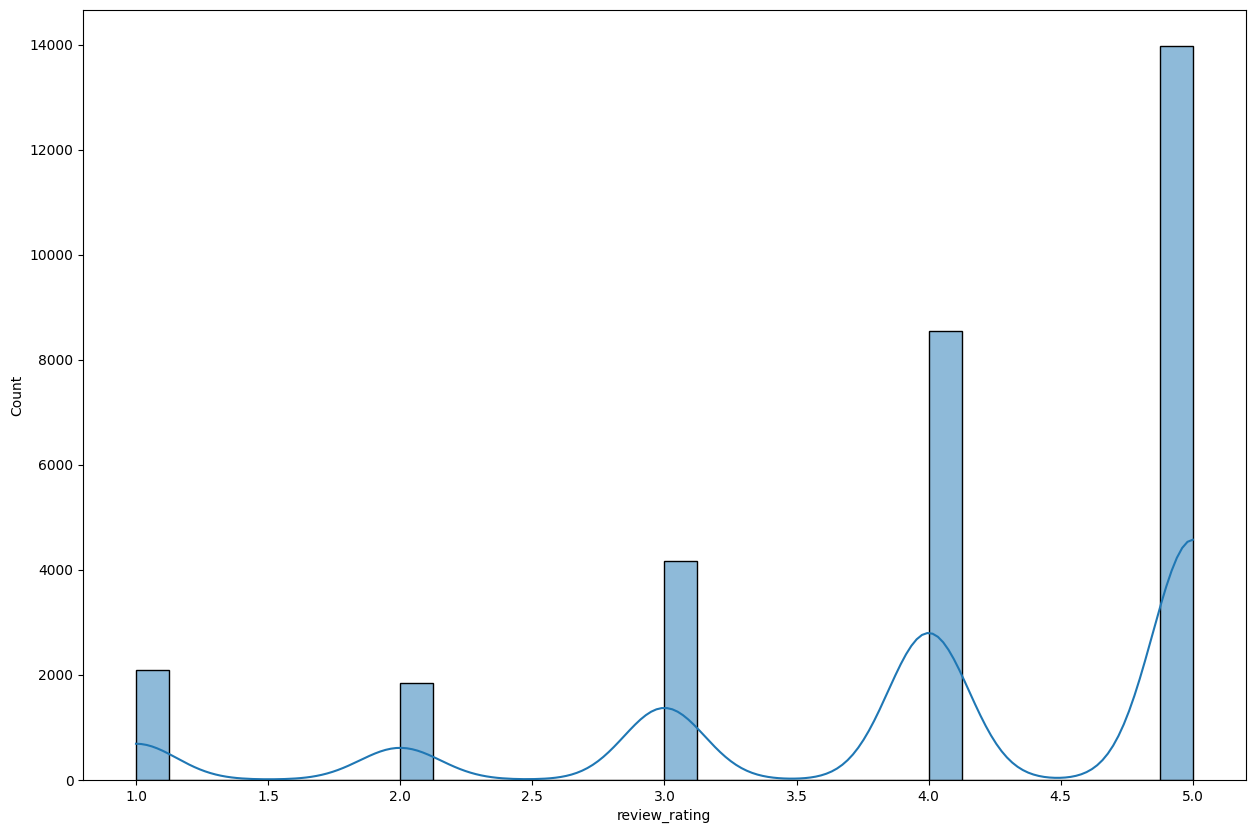

In [ ]:
sns.histplot(data['review_rating'], kde=True)
plt.show()


<ipython-input-523-24828ae69462>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


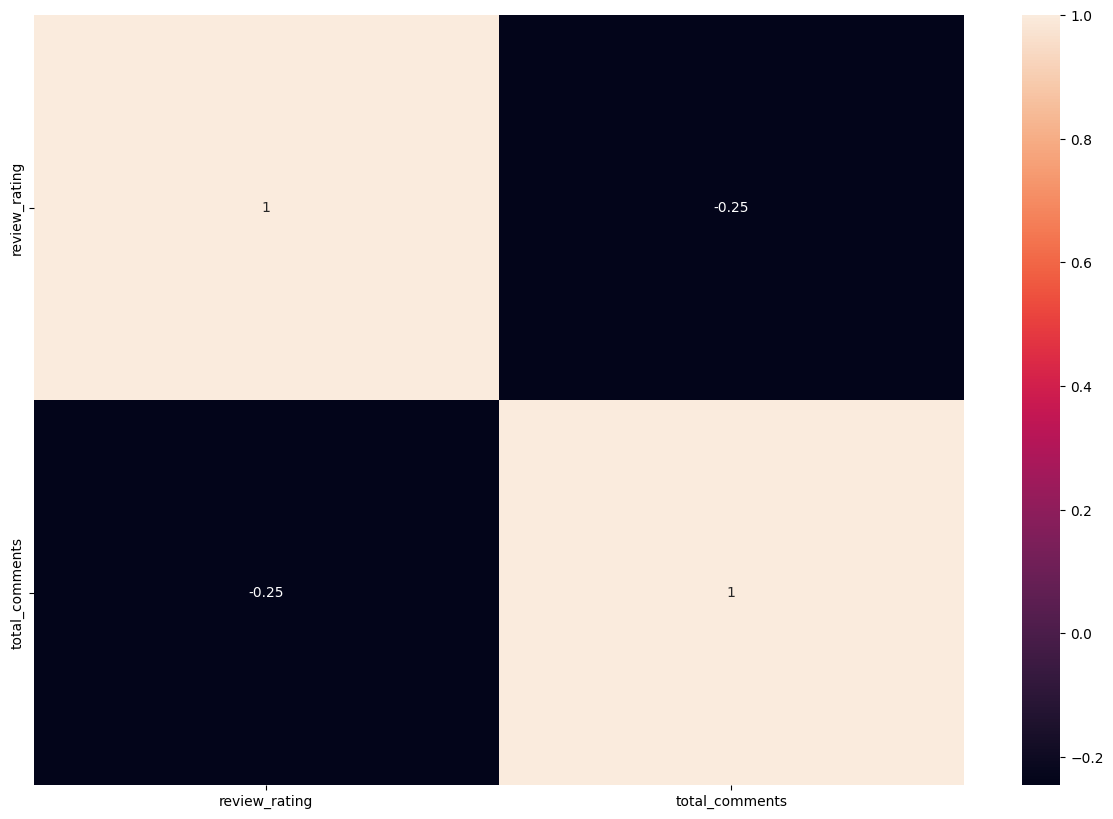

In [ ]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

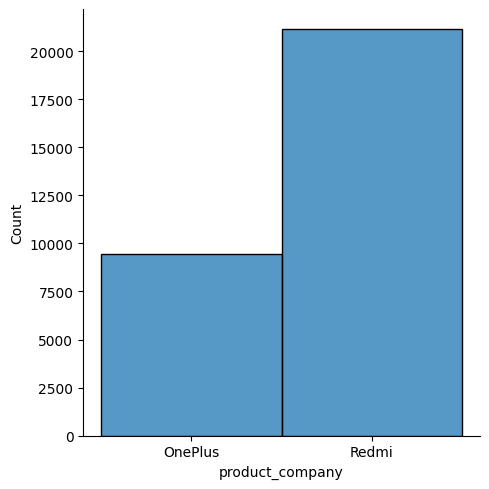

In [ ]:
sns.displot(x=data['product_company'])

<Axes: xlabel='count', ylabel='product'>

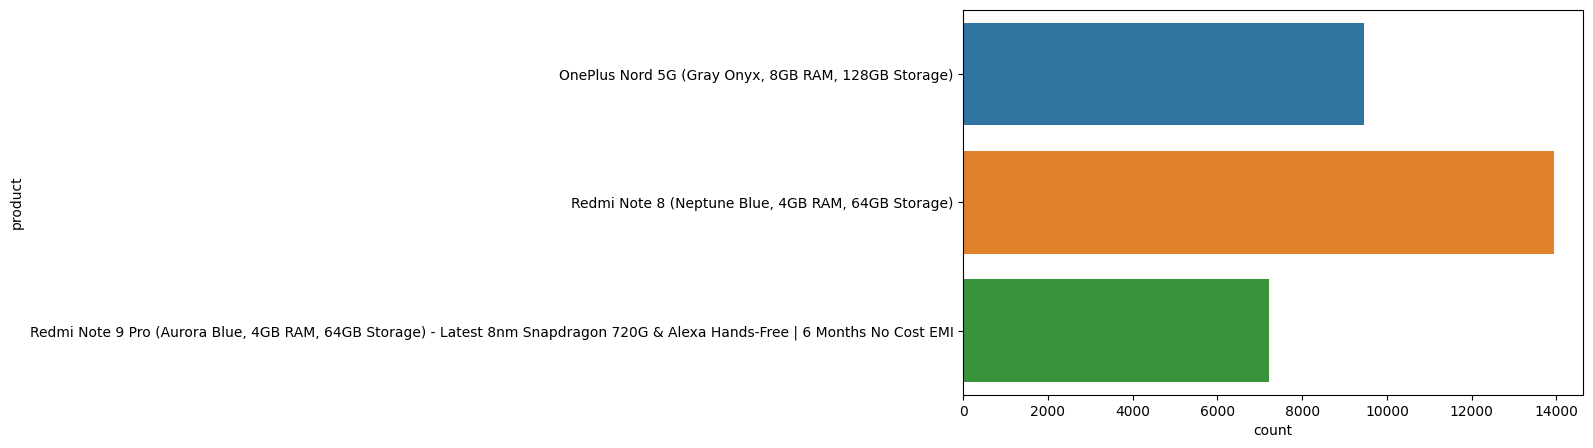

In [ ]:
fig = plt.figure(figsize=(8,5))
sns.countplot(y='product', data=data)

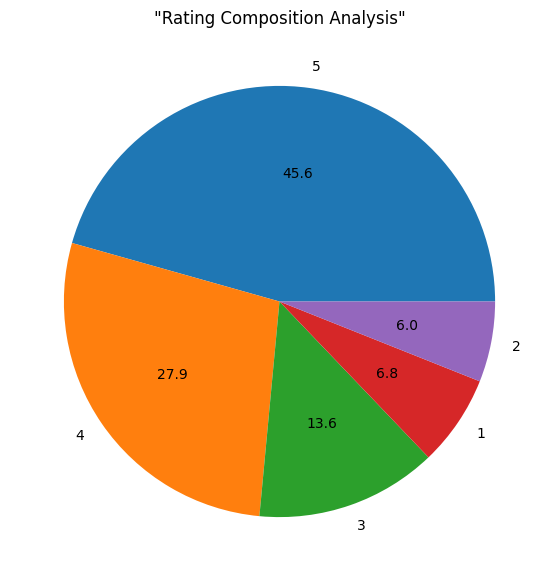

In [ ]:
fig = plt.figure(figsize=(7,7))
tags = data['review_rating'].value_counts()
tags.plot(kind='pie', autopct='%1.1f', label='')
plt.title('"Rating Composition Analysis"')
plt.show()

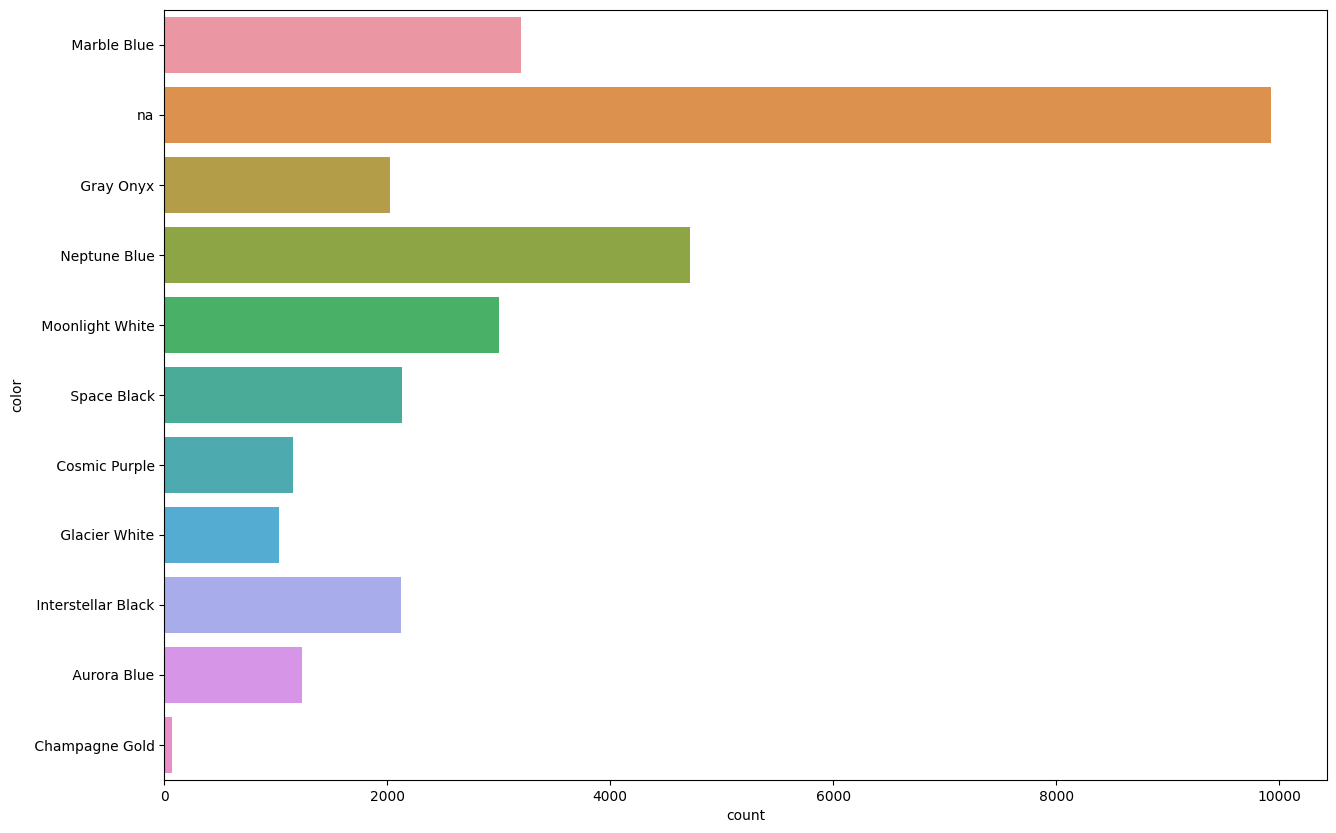

In [ ]:
sns.countplot(y='color', data=data)
plt.show()

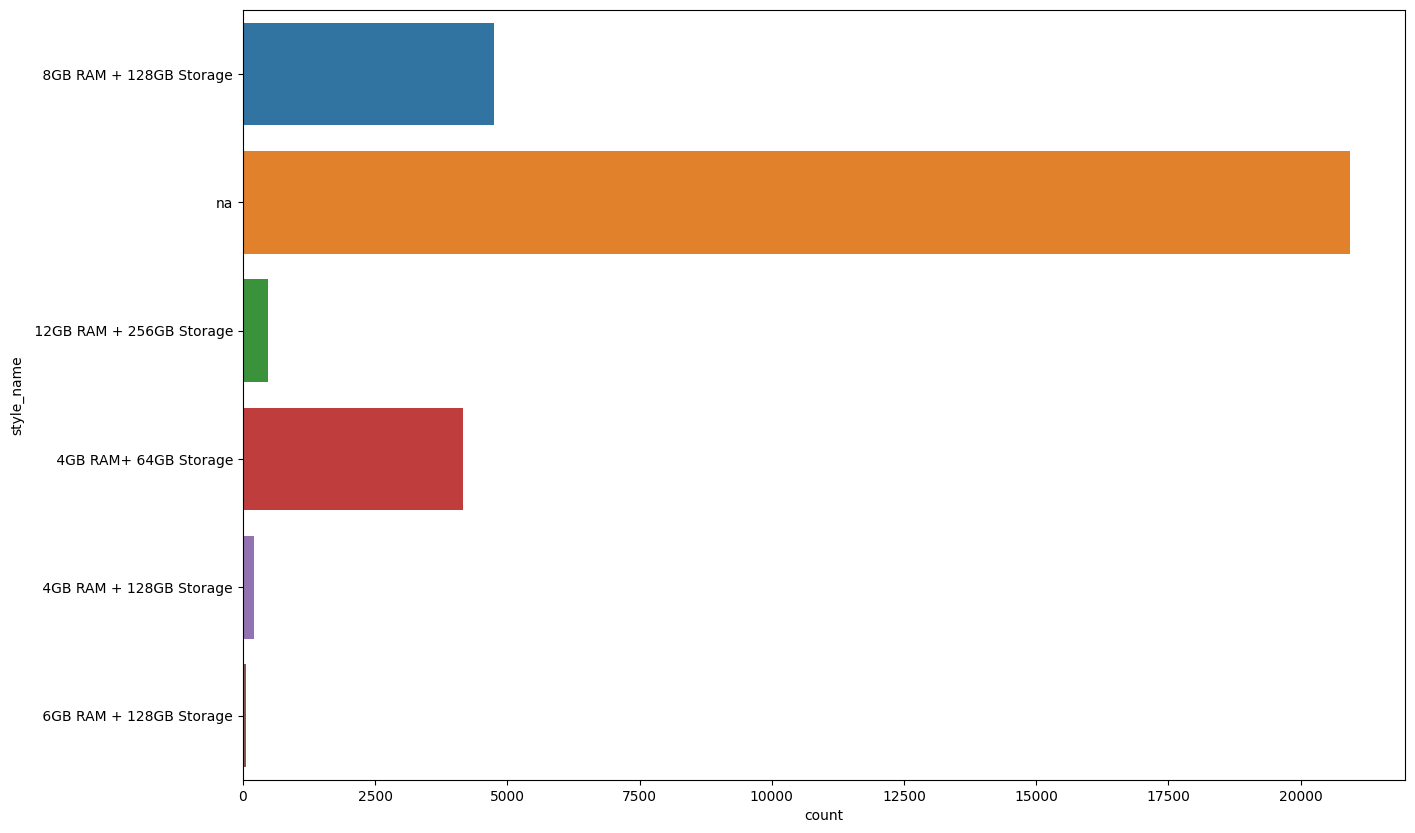

In [ ]:
sns.countplot(y='style_name', data=data)
plt.figsize=(20,15)
plt.show()

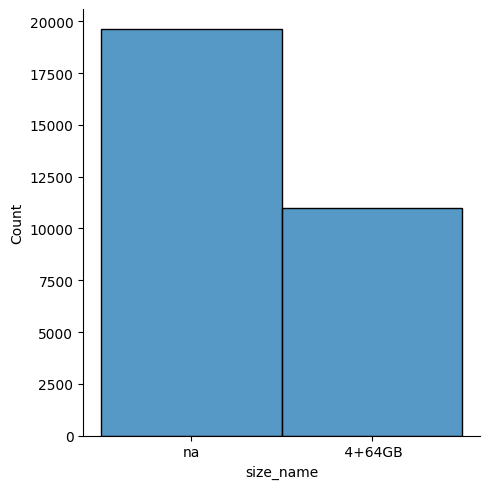

In [ ]:
sns.displot(x='size_name', data=data)
plt.show()

In [ ]:
# map ratings 1, 2, 3 to 0 (NEGATIVE) and 4, 5 to 1 (POSITIVE)
sentiment_score = {1: 0,
                   2: 0,
                   3: 0,
                   4: 1,
                   5: 1}

sentiment = {0: 'NEGATIVE',
             1: 'POSITIVE'}


# mapping
data['sentiment_score'] = data['review_rating'].map(sentiment_score)
data['sentiment'] = data['sentiment_score'].map(sentiment)

data.head()

,product,product_company,profile_name,review_title,review_rating,review_text,helpful_count,total_comments,review_country,reviewed_at,...,verified_purchase,color,style_name,size_name,category,sub_category,images,text,sentiment_score,sentiment
0,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Nikhil,*Read before you buy!!*,5,"Yea..pre-ordered on 28 July, got it on 4 Au...",721 people found this helpful,3,India,2020-08-04,...,Verified Purchase,Marble Blue,8GB RAM + 128GB Storage,na,electronics,mobiles,['https://images-na.ssl-images-amazon.com/imag...,yeapreordered july got august package nice wit...,1,POSITIVE
1,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Amit,Near to mid range Perfection,5,"Got it delivered yesterday , used for about...",436 people found this helpful,1,India,2020-08-03,...,Verified Purchase,na,na,na,electronics,mobiles,[],got delivered yesterday used hour tell first m...,1,POSITIVE
2,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,aishwarya,Great price!,5,An amazing phone!,322 people found this helpful,1,India,2020-08-04,...,Verified Purchase,na,na,na,electronics,mobiles,['https://images-na.ssl-images-amazon.com/imag...,amazing phone,1,POSITIVE
3,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,vasu a.,Beast in OnePlus.,5,Brilliant..,243 people found this helpful,7,India,2020-08-02,...,Verified Purchase,na,na,na,electronics,mobiles,['https://images-na.ssl-images-amazon.com/imag...,brilliant,1,POSITIVE
4,"OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...",OnePlus,Amazon Customer,Changed to Nord from 6t,5,I was skeptical about changing from One plu...,109 people found this helpful,2,India,2020-08-04,...,Verified Purchase,na,na,na,electronics,mobiles,[],skeptical changing one plus nord still process...,1,POSITIVE


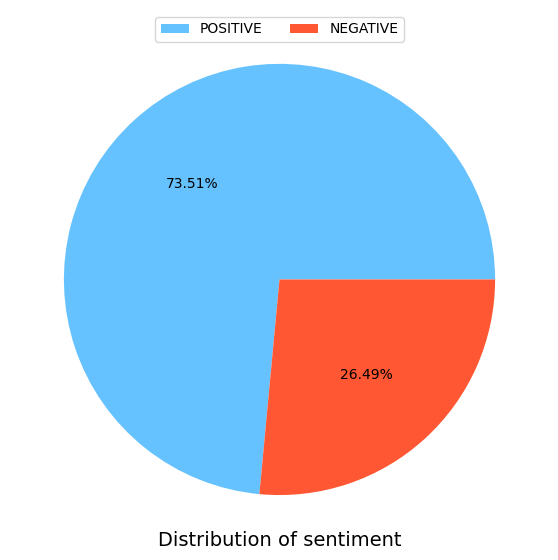

In [ ]:
plt.figure(figsize = (7, 7))

labels = ['POSITIVE', 'NEGATIVE']
colors = ['#66C2FF', '#FF5733']
plt.pie(data['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)
plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

In [ ]:
all_words = pd.Series(' '.join(data['review_text']).split())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


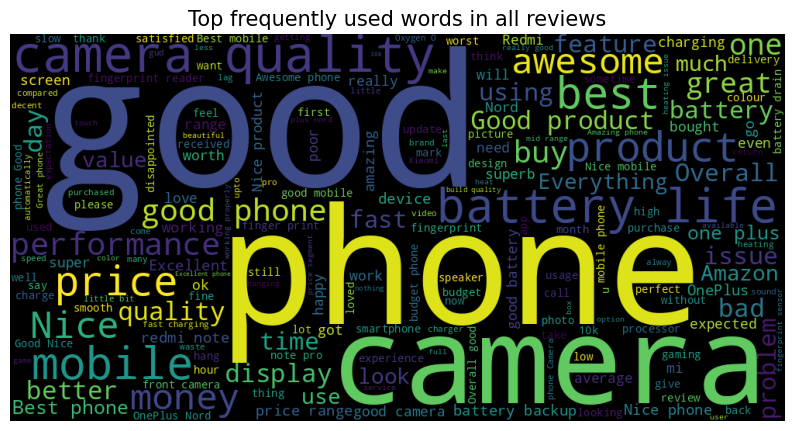

In [ ]:
# plot word cloud
import matplotlib.pyplot as plt
nltk.download('wordnet')
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(10,8))

plt.imshow(wordcloud)
plt.title("Top frequently used words in all reviews", size=15)

plt.axis("off")
plt.show()

In [ ]:
positiveWords = pd.Series(' '.join(data[data['sentiment']=='POSITIVE']['review_text']).split())

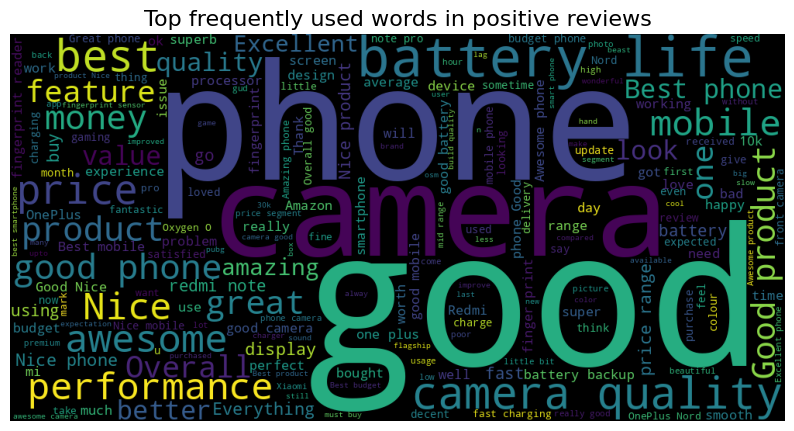

In [ ]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(10,8))

plt.imshow(wordcloud)
plt.title("Top frequently used words in positive reviews", size=16)

plt.axis("off")
plt.show()

In [ ]:
negativeWords = pd.Series(' '.join(data[data['sentiment']=='NEGATIVE']['review_text']).split())

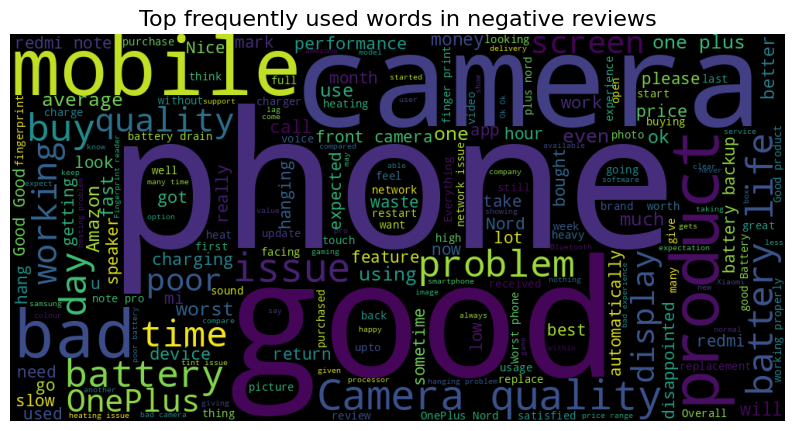

In [ ]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(10,8))

plt.imshow(wordcloud)
plt.title("Top frequently used words in negative reviews", size=16)

plt.axis("off")
plt.show()

In [ ]:
import random

i = random.choice(range(len(data)))
original_review = data['review_text'].iloc[i].strip()
processed_review = data['text'].iloc[i]

print(f"Original review: \n{original_review}\n")
print(f"Processed review: \n{processed_review}\n")


Original review: 
Too many advertisements

Processed review: 
many advertisement



In [ ]:
data['sentiment_score'].value_counts()

1    22504
0     8108
Name: sentiment_score, dtype: int64

In [ ]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30612 entries, 0 to 30611
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product            30612 non-null  string        
 1   product_company    30612 non-null  string        
 2   profile_name       30612 non-null  string        
 3   review_title       30612 non-null  string        
 4   review_rating      30612 non-null  int64         
 5   review_text        30612 non-null  string        
 6   helpful_count      30612 non-null  string        
 7   total_comments     30612 non-null  int64         
 8   review_country     30612 non-null  string        
 9   reviewed_at        30612 non-null  datetime64[ns]
 10  url                30612 non-null  string        
 11  crawled_at         30612 non-null  datetime64[ns]
 12  _id                30612 non-null  string        
 13  verified_purchase  30612 non-null  string        
 14  color 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from tensorflow.keras import layers
from sklearn.preprocessing import OneHotEncoder
plt.rcParams['figure.figsize'] = [15, 10]
from keras.layers import Embedding, LSTM, SpatialDropout1D, Bidirectional, Dense, Dropout
tf.autograph.set_verbosity(10)

### Model 1: LSTM

In [ ]:
tokenizer = Tokenizer(num_words=10000, split=' ')
tokenizer.fit_on_texts(data['text'])
X = tokenizer.texts_to_sequences(data['text'])
X = pad_sequences(X, maxlen=100)
encoder = OneHotEncoder()
y= data['total_comments'].values.reshape(-1, 1)
y_encoded = encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train[0:4]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,   33,    7,   18,  252,   56,  817,  173, 2878,   52,  367,
         198],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    

In [ ]:
X_train.shape

(24489, 100)

In [ ]:
data['total_comments'].value_counts()

0     28811
1      1658
2        72
3        30
4        16
7         6
5         6
6         4
17        2
10        2
21        2
24        2
18        1
Name: total_comments, dtype: int64

In [ ]:
print("Size of X_train: ", (X_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of X_test: ", (X_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of X_train:  (24489, 100)
Size of y_train:  (24489, 1)
Size of X_test:  (6123, 100)
Size of y_test:  (6123, 1)


In [ ]:
model = Sequential()
model.add(Embedding(10000,64, input_length= len(X_train[0])))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 64)           640000    
                                                                 
 spatial_dropout1d_6 (Spati  (None, 100, 64)           0         
 alDropout1D)                                                    
                                                                 
 lstm_6 (LSTM)               (None, 64)                33024     
                                                                 
 dense_17 (Dense)            (None, 128)               8320      
                                                                 
 dropout_302 (Dropout)       (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 1)                 129       
                                                      

In [ ]:
model.compile('Adam','binary_crossentropy', ['accuracy'])


In [ ]:
 history = model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=1)


Epoch 1/5


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


383/383 [==============================] - 22s 49ms/step - loss: 0.2522 - accuracy: 0.9393
Epoch 2/5
383/383 [==============================] - 5s 14ms/step - loss: 0.1616 - accuracy: 0.9439
Epoch 3/5
383/383 [==============================] - 5s 13ms/step - loss: -0.0354 - accuracy: 0.9449
Epoch 4/5
383/383 [==============================] - 4s 11ms/step - loss: -0.7589 - accuracy: 0.9479
Epoch 5/5
383/383 [==============================] - 3s 9ms/step - loss: -2.0140 - accuracy: 0.9502


In [ ]:
for epoch, accuracy in enumerate(history.history['accuracy'], 1):
    print(f'Epoch {epoch}: Accuracy = {accuracy}')

Epoch 1: Accuracy = 0.9392788410186768
Epoch 2: Accuracy = 0.9439340233802795
Epoch 3: Accuracy = 0.9448732137680054
Epoch 4: Accuracy = 0.9478949904441833
Epoch 5: Accuracy = 0.9501817226409912


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.3)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


192/192 [==============================] - 1s 3ms/step



LSTM Classifier:
Accuracy: 96.41%
F1 Score: 98.17
Recall: 96.41


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


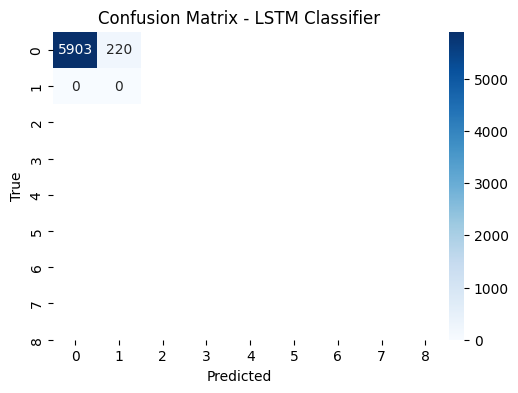

In [ ]:
# Evaluate the LSTM classifier
acc_lstm = accuracy_score(y_test.argmax(axis=1), y_pred)
recall_lstm = recall_score(y_test.argmax(axis=1), y_pred, average='weighted')
f1_lstm = f1_score(y_test.argmax(axis=1), y_pred, average='weighted')

print("\nLSTM Classifier:")
print(f"Accuracy: {acc_lstm*100:.2f}%")
print(f"F1 Score: {f1_lstm*100:.2f}")
print(f"Recall: {recall_lstm*100:.2f}")

# Plot confusion matrix for LSTM
cm_lstm = confusion_matrix(y_test.argmax(axis=1), y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=range(9), yticklabels=range(9))
plt.title('Confusion Matrix - LSTM Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

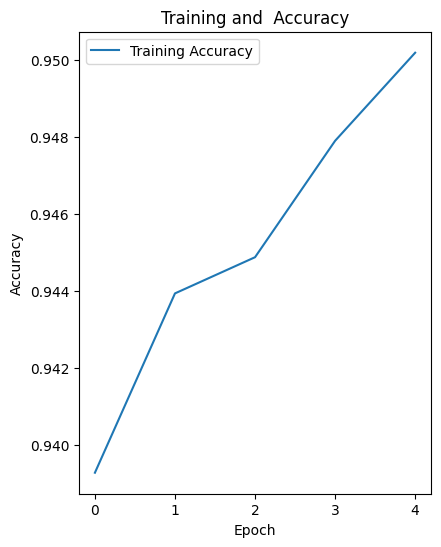

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and  Accuracy')
plt.legend()

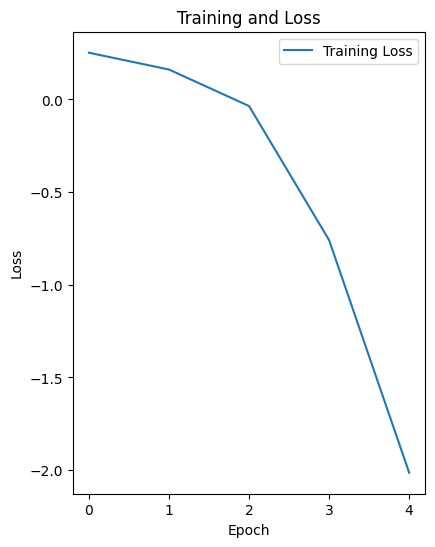

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Loss')
plt.legend()

In [ ]:
def calculate_confusion_matrix(y_test, y_pred, classes=None, title='Confusion matrix', cmap=plt.cm.Blues, figsize=(8, 6)):
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=figsize)  # Adjust the figure size here
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.show()

Decision Tree Accuracy on training set:0.99216
Decision Tree Accuracy on test set: 0.91
Decision Tree Recall on test set: 0.91
Decision Tree F1 Score on test set: 0.91
Decision Tree Confusion Matrix:


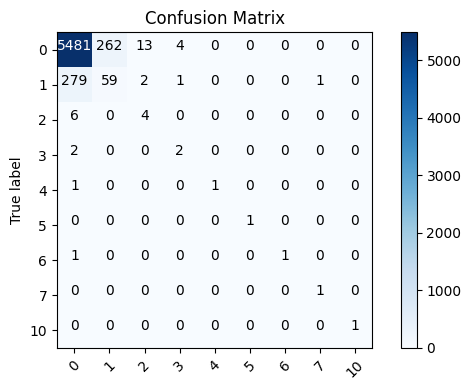

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5760
           1       0.18      0.17      0.18       342
           2       0.21      0.40      0.28        10
           3       0.29      0.50      0.36         4
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         1
           6       1.00      0.50      0.67         2
           7       0.50      1.00      0.67         1
          10       1.00      1.00      1.00         1

    accuracy                           0.91      6123
   macro avg       0.68      0.67      0.64      6123
weighted avg       0.91      0.91      0.91      6123



In [ ]:
import itertools
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

dt = DecisionTreeClassifier()
model1= dt.fit(X_train, y_train)
pred1 = dt.predict(X_test)

# Evaluation metrics
print("Decision Tree Accuracy on training set:{:.5f}".format(model1.score(X_train, y_train)))
print("Decision Tree Accuracy on test set: {:.2f}".format(accuracy_score(y_test, pred1)))
print("Decision Tree Recall on test set: {:.2f}".format(recall_score(y_test, pred1, average='weighted')))
print("Decision Tree F1 Score on test set: {:.2f}".format(f1_score(y_test, pred1, average='weighted')))
print("Decision Tree Confusion Matrix:")
calculate_confusion_matrix(y_test, pred1, classes=np.unique(y_test), title="Confusion Matrix",figsize=(6, 4))
print("Decision Tree Classification Report:")
print(classification_report(y_test, pred1))

<ipython-input-558-a89f70d9f4df>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf = rf.fit(X_train, y_train)


Random Forest Accuracy on training set: 0.99208
Random Forest Accuracy on test set: 0.94
Random Forest Recall on test set: 0.94
Random Forest F1 Score on test set: 0.92
Random Forest Confusion Matrix:


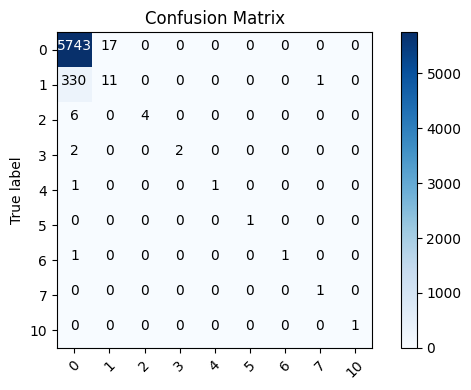

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5760
           1       0.39      0.03      0.06       342
           2       1.00      0.40      0.57        10
           3       1.00      0.50      0.67         4
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         1
           6       1.00      0.50      0.67         2
           7       0.50      1.00      0.67         1
          10       1.00      1.00      1.00         1

    accuracy                           0.94      6123
   macro avg       0.87      0.66      0.70      6123
weighted avg       0.91      0.94      0.92      6123



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier()
model_rf = rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

# Evaluation metrics
print("Random Forest Accuracy on training set: {:.5f}".format(model_rf.score(X_train, y_train)))
print("Random Forest Accuracy on test set: {:.2f}".format(accuracy_score(y_test, pred_rf)))
print("Random Forest Recall on test set: {:.2f}".format(recall_score(y_test, pred_rf, average='weighted')))
print("Random Forest F1 Score on test set: {:.2f}".format(f1_score(y_test, pred_rf, average='weighted')))
print("Random Forest Confusion Matrix:")
calculate_confusion_matrix(y_test, pred_rf, classes=np.unique(y_test), title="Confusion Matrix",figsize=(6, 4))
print("Random Forest Classification Report:")
print(classification_report(y_test, pred_rf))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy on training set: 0.93875
Logistic Regression Accuracy on test set: 0.94
Logistic Regression Recall on test set: 0.94
Logistic Regression F1 Score on test set: 0.91
Logistic Regression Confusion Matrix:


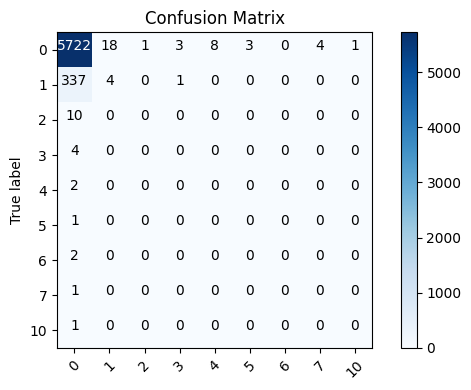

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      5760
           1       0.18      0.01      0.02       342
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1

    accuracy                           0.94      6123
   macro avg       0.12      0.11      0.11      6123
weighted avg       0.90      0.94      0.91      6123



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Model
lr = LogisticRegression()
model_lr = lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

# Evaluation metrics
print("Logistic Regression Accuracy on training set: {:.5f}".format(model_lr.score(X_train, y_train)))
print("Logistic Regression Accuracy on test set: {:.2f}".format(accuracy_score(y_test, pred_lr)))
print("Logistic Regression Recall on test set: {:.2f}".format(recall_score(y_test, pred_lr, average='weighted')))
print("Logistic Regression F1 Score on test set: {:.2f}".format(f1_score(y_test, pred_lr, average='weighted')))
print("Logistic Regression Confusion Matrix:")
calculate_confusion_matrix(y_test, pred_lr, classes=np.unique(y_test), title="Confusion Matrix",figsize=(6, 4))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, pred_lr))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Accuracy on training set: 0.94712
SVM Accuracy on test set: 0.94
SVM Recall on test set: 0.94
SVM F1 Score on test set: 0.91
SVM Confusion Matrix:


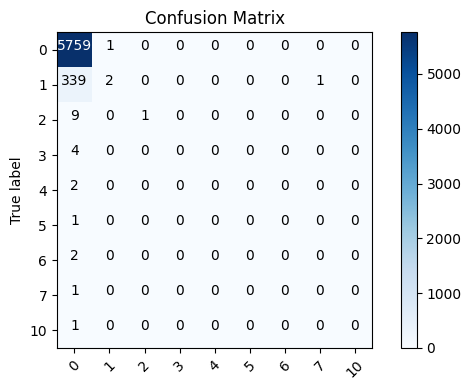

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5760
           1       0.67      0.01      0.01       342
           2       1.00      0.10      0.18        10
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1

    accuracy                           0.94      6123
   macro avg       0.29      0.12      0.13      6123
weighted avg       0.92      0.94      0.91      6123



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC

# Create a SVM model
svm = SVC(random_state=0)
model_svm = svm.fit(X_train, y_train)
pred_svm = model_svm.predict(X_test)

# Evaluation metrics
print("SVM Accuracy on training set: {:.5f}".format(model_svm.score(X_train, y_train)))
print("SVM Accuracy on test set: {:.2f}".format(accuracy_score(y_test, pred_svm)))
print("SVM Recall on test set: {:.2f}".format(recall_score(y_test, pred_svm, average='weighted')))
print("SVM F1 Score on test set: {:.2f}".format(f1_score(y_test, pred_svm, average='weighted')))
print("SVM Confusion Matrix:")
calculate_confusion_matrix(y_test, pred_svm, classes=np.unique(y_test), title="Confusion Matrix",figsize=(6, 4))
print("SVM Classification Report:")
print(classification_report(y_test, pred_svm))


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Accuracy on training set: 0.94406
KNN Accuracy on test set: 0.94
KNN Recall on test set: 0.94
KNN F1 Score on test set: 0.92
KNN Confusion Matrix:


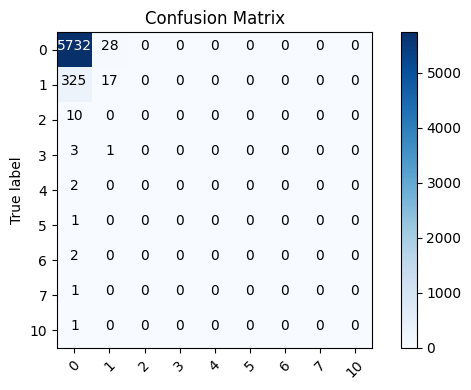

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5760
           1       0.37      0.05      0.09       342
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1

    accuracy                           0.94      6123
   macro avg       0.15      0.12      0.12      6123
weighted avg       0.91      0.94      0.92      6123



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Model
knn = KNeighborsClassifier()
model_knn = knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

# Evaluation metrics
print("KNN Accuracy on training set: {:.5f}".format(model_knn.score(X_train, y_train)))
print("KNN Accuracy on test set: {:.2f}".format(accuracy_score(y_test, pred_knn)))
print("KNN Recall on test set: {:.2f}".format(recall_score(y_test, pred_knn, average='weighted')))
print("KNN F1 Score on test set: {:.2f}".format(f1_score(y_test, pred_knn, average='weighted')))
print("KNN Confusion Matrix:")
calculate_confusion_matrix(y_test, pred_knn, classes=np.unique(y_test), title="Confusion Matrix",figsize=(6, 4))
print("KNN Classification Report:")
print(classification_report(y_test, pred_knn))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Accuracy on training set: 0.94937
Gradient Boosting Accuracy on test set: 0.94
Gradient Boosting Recall on test set: 0.94
Gradient Boosting F1 Score on test set: 0.92
Gradient Boosting Confusion Matrix:


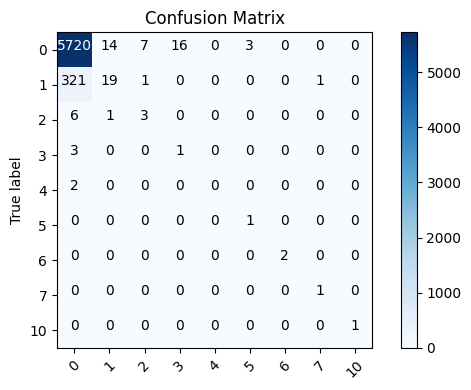

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5760
           1       0.56      0.06      0.10       342
           2       0.27      0.30      0.29        10
           3       0.06      0.25      0.10         4
           4       0.00      0.00      0.00         2
           5       0.25      1.00      0.40         1
           6       1.00      1.00      1.00         2
           7       0.50      1.00      0.67         1
          10       1.00      1.00      1.00         1

    accuracy                           0.94      6123
   macro avg       0.51      0.62      0.50      6123
weighted avg       0.92      0.94      0.92      6123



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Model
gb = GradientBoostingClassifier()
model_gb = gb.fit(X_train, y_train)
pred_gb = gb.predict(X_test)

# Evaluation metrics
print("Gradient Boosting Accuracy on training set: {:.5f}".format(model_gb.score(X_train, y_train)))
print("Gradient Boosting Accuracy on test set: {:.2f}".format(accuracy_score(y_test, pred_gb)))
print("Gradient Boosting Recall on test set: {:.2f}".format(recall_score(y_test, pred_gb, average='weighted')))
print("Gradient Boosting F1 Score on test set: {:.2f}".format(f1_score(y_test, pred_gb, average='weighted')))
print("Gradient Boosting Confusion Matrix:")
calculate_confusion_matrix(y_test, pred_gb, classes=np.unique(y_test), title="Confusion Matrix",figsize=(6, 4))
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, pred_gb))


#Model2- BERT classifier


In [ ]:
from simpletransformers.classification import ClassificationModel

# Creation of TransformerModel
model = ClassificationModel('bert', 'bert-base-cased', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda=False)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def making_label(st):
    if(st=='positive'):
        return 0
    elif(st=='neutral'):
        return 2
    else:
        return 1

data['label'] = data['text'].apply(making_label)

print(data.shape)

(30612, 24)


In [ ]:
from transformers import BertTokenizer, TFBertModel
from sklearn.model_selection import train_test_split

In [ ]:
X = data['text'].astype(str)
y = data['total_comments']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# Tokenize and encode the training and testing data
def regular_encode(texts, tokenizer, maxlen=128):
    enc_di = tokenizer.batch_encode_plus(
        texts,
        return_token_type_ids=False,
        return_attention_mask=False,
        pad_to_max_length=True,
        max_length=maxlen,
        truncation=True
    )
    return np.array(enc_di['input_ids'])

In [ ]:
X_train_encoded = regular_encode(X_train.astype('str'), tokenizer, maxlen=128)
X_test_encoded = regular_encode(X_test.astype('str'), tokenizer, maxlen=128)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# Converting labels to one-hot encoding
y_train_encoded = tf.keras.utils.to_categorical(y_train, dtype='int32')
y_test_encoded = tf.keras.utils.to_categorical(y_test, dtype='int32')

In [ ]:
# Define the BERT-based model for text classification
input_ids = tf.keras.layers.Input(shape=(128,), name='input_ids', dtype='int32')
bert_output = bert_model(input_ids)[1]
output = tf.keras.layers.Dense(y_train_encoded.shape[1], activation='softmax')(bert_output)

model = tf.keras.Model(inputs=input_ids, outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
batch_size = 32
desired_batches = 112

# Calculate the steps_per_epoch
steps_per_epoch = min(desired_batches, len(X_train) // batch_size)

# Train the model with the specified steps_per_epoch and increased batch size
history1 = model.fit(X_train_encoded, y_train_encoded, epochs=5, batch_size=batch_size, steps_per_epoch=steps_per_epoch, verbose=1)


Epoch 1/5


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


112/112 [==============================] - 125s 788ms/step - loss: 0.4683 - accuracy: 0.9182
Epoch 2/5
112/112 [==============================] - 92s 818ms/step - loss: 0.2793 - accuracy: 0.9364
Epoch 3/5
112/112 [==============================] - 94s 837ms/step - loss: 0.2584 - accuracy: 0.9369
Epoch 4/5
112/112 [==============================] - 95s 845ms/step - loss: 0.2372 - accuracy: 0.9408
Epoch 5/5
112/112 [==============================] - 95s 847ms/step - loss: 0.2307 - accuracy: 0.9425



BERT Classifier:
Accuracy: 92.08%
F1 Score: 91.11
Recall: 92.08


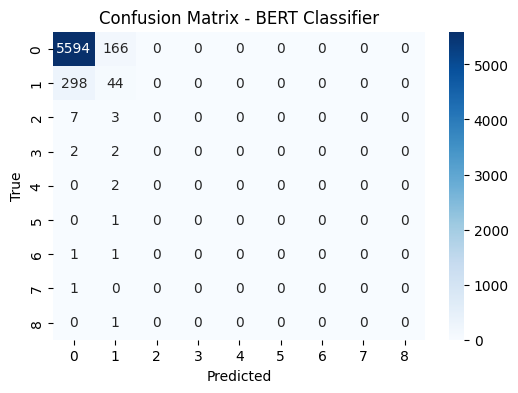

In [ ]:
import numpy as np

# Convert y_test to a NumPy array
y_test_np = np.array(y_test)

# Evaluate the BERT classifier
acc_bert = accuracy_score(y_test_np, y_pred)
recall_bert = recall_score(y_test_np, y_pred, average='weighted')
f1_bert = f1_score(y_test_np, y_pred, average='weighted')

print("\nBERT Classifier:")
print(f"Accuracy: {acc_bert*100:.2f}%")
print(f"F1 Score: {f1_bert*100:.2f}")
print(f"Recall: {recall_bert*100:.2f}")

# Plot confusion matrix for BERT classifier
cm_bert = confusion_matrix(y_test_np, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm_bert, annot=True, fmt='d', cmap='Blues', xticklabels=range(9), yticklabels=range(9))
plt.title('Confusion Matrix - BERT Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
print("Classification Report:\n", classification_report(np.argmax(y_test_encoded, axis=1), predicted_labels))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      5760
           1       0.00      0.00      0.00       342
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1

    accuracy                           0.94      6123
   macro avg       0.10      0.11      0.11      6123
weighted avg       0.88      0.94      0.91      6123



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


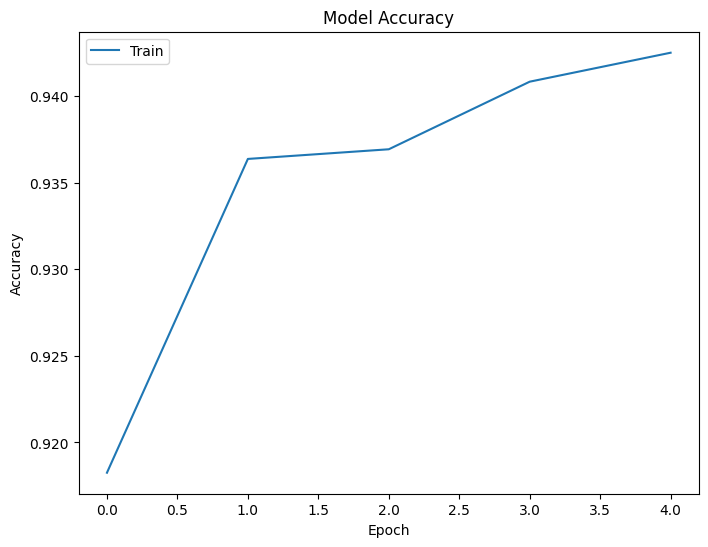

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history1.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

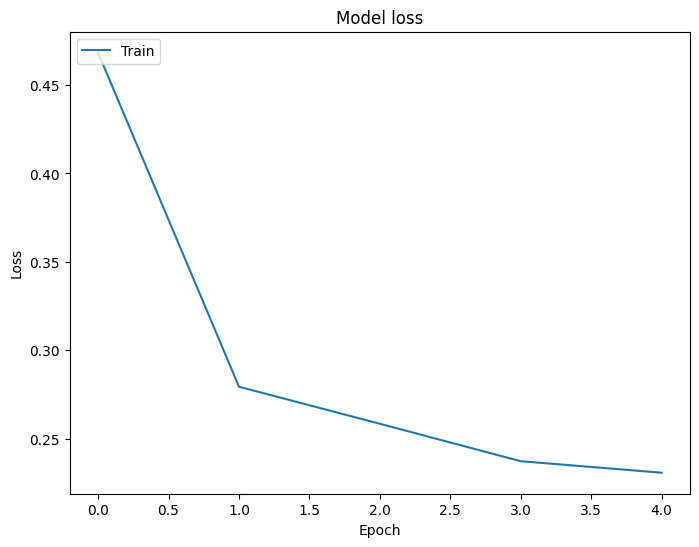

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history1.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Classifier Accuracy: 0.90511
Decision Tree Classifier Recall: 0.91
Decision Tree Classifier F1 Score: 0.90


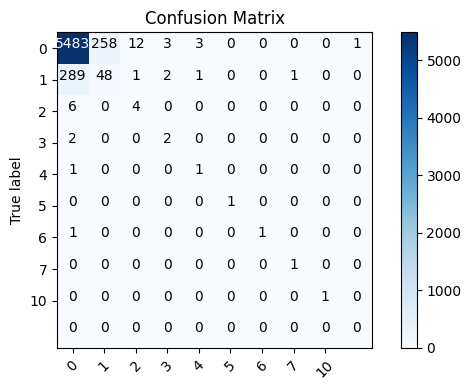

Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5760
           1       0.16      0.14      0.15       342
           2       0.24      0.40      0.30        10
           3       0.29      0.50      0.36         4
           4       0.20      0.50      0.29         2
           5       1.00      1.00      1.00         1
           6       1.00      0.50      0.67         2
           7       0.50      1.00      0.67         1
          10       1.00      1.00      1.00         1
          24       0.00      0.00      0.00         0

    accuracy                           0.91      6123
   macro avg       0.53      0.60      0.54      6123
weighted avg       0.90      0.91      0.90      6123



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split


# Decision Tree Model
dt = DecisionTreeClassifier()
model_dt = dt.fit(X_train_encoded, y_train)
y_pred_dt = model_dt.predict(X_test_encoded)

# Evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print(f'Decision Tree Classifier Accuracy: {accuracy_dt:.5f}')
print(f'Decision Tree Classifier Recall: {recall_dt:.2f}')
print(f'Decision Tree Classifier F1 Score: {f1_dt:.2f}')

# Confusion Matrix
calculate_confusion_matrix(y_test, y_pred_dt, classes=np.unique(y_test), title="Confusion Matrix", figsize=(6, 4))

# Classification Report
print('Decision Tree Classifier Classification Report:')
print(classification_report(y_test, y_pred_dt))


Random Forest Classifier Accuracy: 0.9412052915237629
Random Forest Classifier Recall: 0.94
Random Forest Classifier F1 Score: 0.92


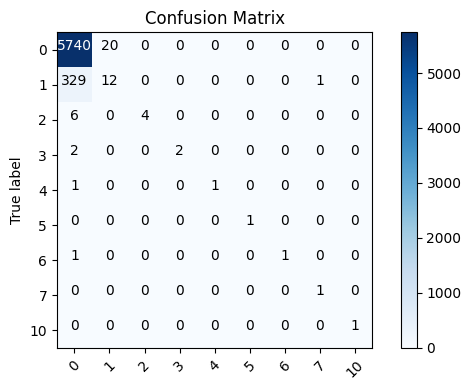

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5760
           1       0.38      0.04      0.06       342
           2       1.00      0.40      0.57        10
           3       1.00      0.50      0.67         4
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         1
           6       1.00      0.50      0.67         2
           7       0.50      1.00      0.67         1
          10       1.00      1.00      1.00         1

    accuracy                           0.94      6123
   macro avg       0.87      0.66      0.70      6123
weighted avg       0.91      0.94      0.92      6123



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf = rf.fit(X_train_encoded, y_train)
y_pred_rf = model_rf.predict(X_test_encoded)

# Evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f'Random Forest Classifier Accuracy: {accuracy_rf}')
print(f'Random Forest Classifier Recall: {recall_rf:.2f}')
print(f'Random Forest Classifier F1 Score: {f1_rf:.2f}')

# Confusion Matrix
calculate_confusion_matrix(y_test, y_pred_rf, classes=np.unique(y_test), title="Confusion Matrix", figsize=(6, 4))

# Classification Report
print('Random Forest Classifier Classification Report:')
print(classification_report(y_test, y_pred_rf))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.938265556099951
Logistic Regression Recall: 0.94
Logistic Regression F1 Score: 0.91


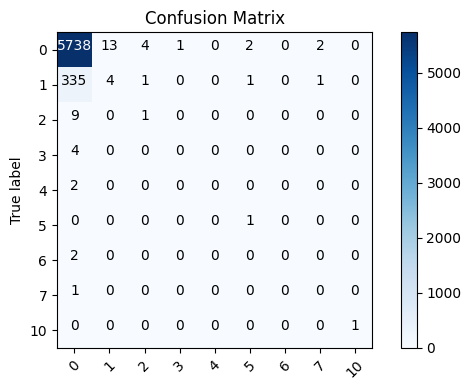

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5760
           1       0.24      0.01      0.02       342
           2       0.17      0.10      0.12        10
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2
           5       0.25      1.00      0.40         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1

    accuracy                           0.94      6123
   macro avg       0.29      0.35      0.28      6123
weighted avg       0.90      0.94      0.91      6123



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

# Logistic Regression Model
lr = LogisticRegression(random_state=42)
model_lr = lr.fit(X_train_encoded, y_train)
y_pred_lr = model_lr.predict(X_test_encoded)

# Evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print(f'Logistic Regression Accuracy: {accuracy_lr}')
print(f'Logistic Regression Recall: {recall_lr:.2f}')
print(f'Logistic Regression F1 Score: {f1_lr:.2f}')

# Confusion Matrix
calculate_confusion_matrix(y_test, y_pred_lr, classes=np.unique(y_test), title="Confusion Matrix", figsize=(6, 4))

# Classification Report
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_lr))


KNN Accuracy: 0.9367956883880451
KNN Recall: 0.94
KNN F1 Score: 0.91


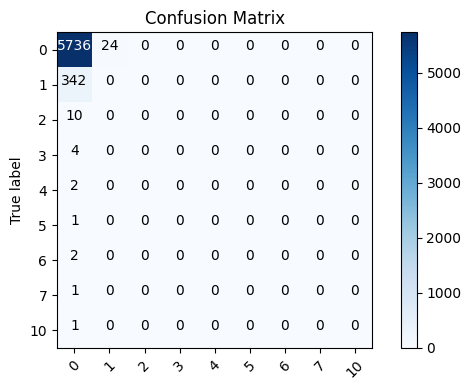

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5760
           1       0.00      0.00      0.00       342
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1

    accuracy                           0.94      6123
   macro avg       0.10      0.11      0.11      6123
weighted avg       0.88      0.94      0.91      6123



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

# K-Nearest Neighbors (KNN) Model
knn = KNeighborsClassifier()
model_knn = knn.fit(X_train_encoded, y_train)
y_pred_knn = model_knn.predict(X_test_encoded)

# Evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print(f'KNN Accuracy: {accuracy_knn}')
print(f'KNN Recall: {recall_knn:.2f}')
print(f'KNN F1 Score: {f1_knn:.2f}')

# Confusion Matrix
calculate_confusion_matrix(y_test, y_pred_knn, classes=np.unique(y_test), title="Confusion Matrix", figsize=(6, 4))

# Classification Report
print('KNN Classification Report:')
print(classification_report(y_test, y_pred_knn))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient Boosting Accuracy: 0.9379389188306386
Gradient Boosting Recall: 0.94
Gradient Boosting F1 Score: 0.91


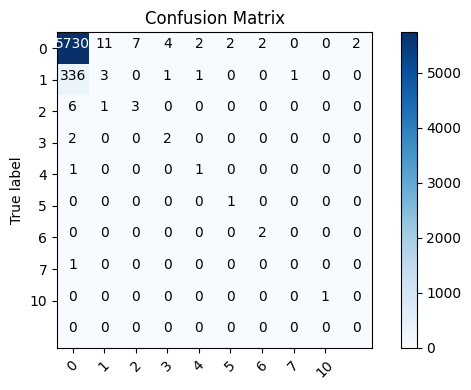

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      5760
           1       0.20      0.01      0.02       342
           2       0.30      0.30      0.30        10
           3       0.29      0.50      0.36         4
           4       0.25      0.50      0.33         2
           5       0.33      1.00      0.50         1
           6       0.50      1.00      0.67         2
           7       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          18       0.00      0.00      0.00         0

    accuracy                           0.94      6123
   macro avg       0.38      0.53      0.41      6123
weighted avg       0.90      0.94      0.91      6123



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming X_train_encoded, X_test_encoded, y_train, y_test are defined

# Gradient Boosting Model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_gb = gb.fit(X_train_encoded, y_train)
y_pred_gb = model_gb.predict(X_test_encoded)

# Evaluation metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')

print(f'Gradient Boosting Accuracy: {accuracy_gb}')
print(f'Gradient Boosting Recall: {recall_gb:.2f}')
print(f'Gradient Boosting F1 Score: {f1_gb:.2f}')

# Confusion Matrix
calculate_confusion_matrix(y_test, y_pred_gb, classes=np.unique(y_test), title="Confusion Matrix", figsize=(6, 4))

# Classification Report
print('Gradient Boosting Classification Report:')
print(classification_report(y_test, y_pred_gb))


In [ ]:
print(f'Decision Tree Classifier accuracy: {accuracy_dt}')
print(f'Random Forest Classifier accuracy: {accuracy_rf}')
print(f'Logistic Regression accuracy: {accuracy_lr}')
print(f'KNN accuracy: {accuracy_knn}')
print(f'Gradient Boosting accuracy: {accuracy_gb}')

Decision Tree Classifier accuracy: 0.9051118732647395
Random Forest Classifier accuracy: 0.9412052915237629
Logistic Regression accuracy: 0.938265556099951
KNN accuracy: 0.9367956883880451
Gradient Boosting accuracy: 0.9379389188306386


#Word2Vec model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['total_comments'], test_size=0.2, random_state=42)


In [ ]:
# Tokenize the text
X_train_tokens = X_train.apply(word_tokenize)
X_test_tokens = X_test.apply(word_tokenize)

In [ ]:
# Train Word2Vec model
word2vec_model = Word2Vec(sentences=X_train_tokens, vector_size=100, window=5, min_count=1, workers=4)


In [ ]:
def vectorize_text(tokens, model):
    vectors = []
    for word in tokens:
        if word in model.wv:
            vectors.append(model.wv[word])
    if not vectors:
          return [0] * model.vector_size
    return sum(vectors) / len(vectors)

In [ ]:
X_train_word2vec = X_train_tokens.apply(lambda x: vectorize_text(x, word2vec_model))
X_test_word2vec = X_test_tokens.apply(lambda x: vectorize_text(x, word2vec_model))

# Convert the lists of vectors to numpy arrays
X_train_word2vec = pd.DataFrame(X_train_word2vec.tolist())
X_test_word2vec = pd.DataFrame(X_test_word2vec.tolist())

# Normalize input data
scaler = StandardScaler()
X_train_word2vec_scaled = scaler.fit_transform(X_train_word2vec)
X_test_word2vec_scaled = scaler.transform(X_test_word2vec)

In [ ]:
# Models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000),
    "SVM": SVC(),
}

In [ ]:
# Results DataFrame
model_performance = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
confusion_matrices = {}

# Model Training and Evaluation
for model_name, model in models.items():
    model.fit(X_train_word2vec_scaled, y_train)
    y_pred = model.predict(X_test_word2vec_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[model_name] = cm

    model_performance = model_performance.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index=True)
print(model_performance)

<ipython-input-596-b04b8d7072d4>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_performance = model_performance.append({
<ipython-input-596-b04b8d7072d4>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_performance = model_performance.append({
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-596-b04b8d7072d4>:17: FutureWarning:

                 Model  Accuracy  Precision    Recall  F1 Score
0        Decision Tree  0.907888   0.907212  0.907888  0.907373
1                  KNN  0.935816   0.905715  0.935816  0.914423
2  Logistic Regression  0.940225   0.912918  0.940225  0.913664
3    Gradient Boosting  0.938592   0.916951  0.938592  0.914157
4                  MLP  0.937449   0.908330  0.937449  0.916857
5                  SVM  0.940715   0.944230  0.940715  0.911979


<ipython-input-596-b04b8d7072d4>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_performance = model_performance.append({


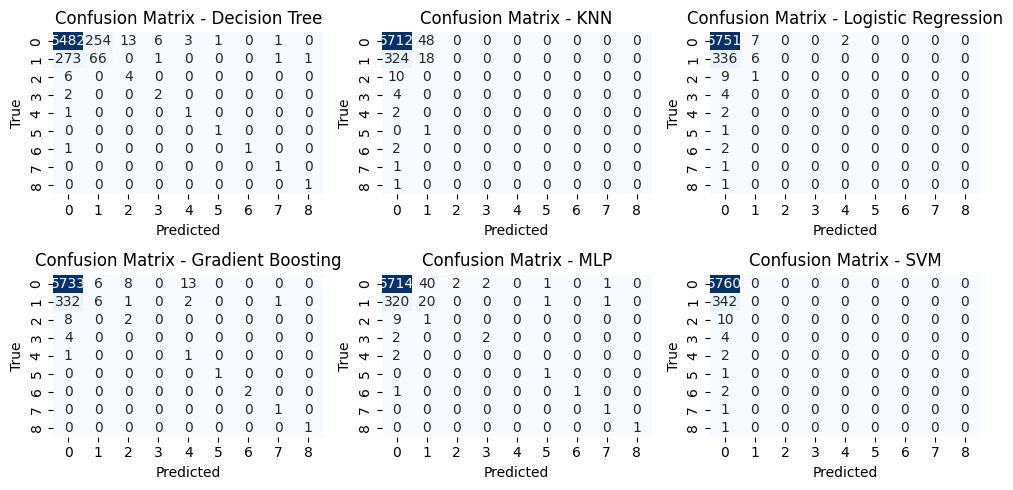

In [ ]:
plt.figure(figsize=(10, 5))
for i, (model_name, cm) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(2, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
plt.tight_layout()
plt.show()

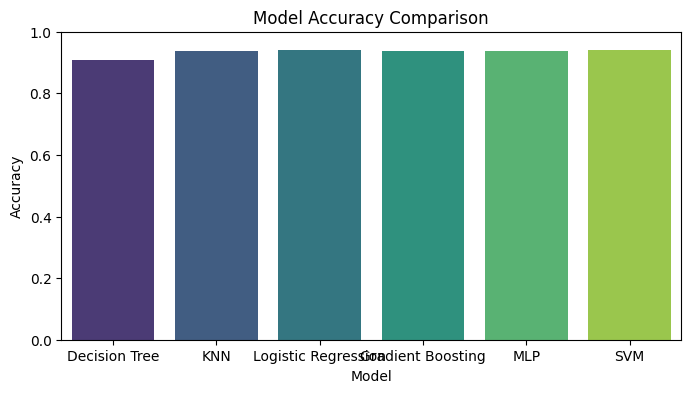

In [ ]:
# Bar Chart for Accuracy
plt.figure(figsize=(8, 4))
sns.barplot(x='Model', y='Accuracy', data=model_performance, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

## Comparision of Models


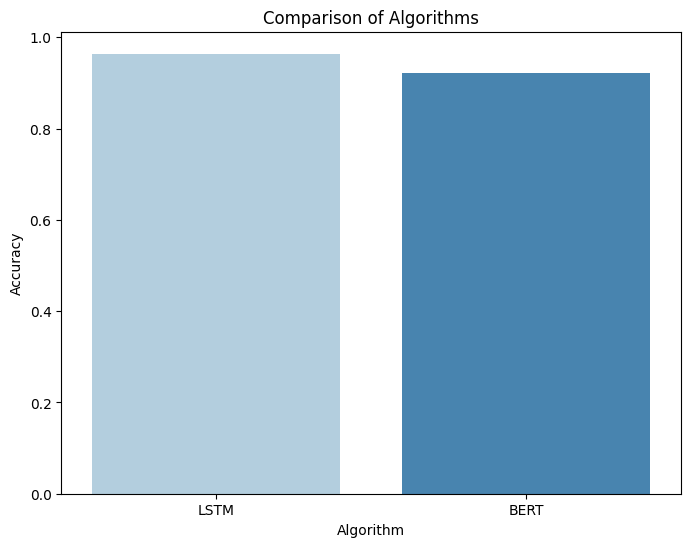

In [ ]:
# Bar Chart for Accuracy
data = pd.DataFrame({
'Algorithm': ['LSTM', 'BERT'],
'Accuracy': [acc_lstm, acc_bert],
})
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Algorithm', y='Accuracy', palette="Blues", label='Accuracy')
plt.title('Comparison of Algorithms')
plt.ylabel('Accuracy')
plt.show()